[Question 2] [20 points]
Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales
of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that
one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best
regression model? Use your implementation from Question 1 (without any basis functions) to answer
the following questions.
1. What is the average least squares error for the given data using your simple linear regression
model?
2. Which factor has the most effect on the final value? How do you know this? Can you use only
this feature to predict the price?
3. Which factor has the least effect on the final value? How do you know this? What effect does
removing this feature have on the performance?

In [1]:
import pandas as pd
import numpy as np

In [45]:
data = pd.read_csv('Assignment1_Q2_Data.csv')

In [3]:
data.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [4]:
data.describe()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,7.221854,1.267857,6.460857,1.511679,1.339286,6.678571,3.285714,36.321429,2.250000,1.214286,0.321429,38.157143
std,8.225975,2.956497,0.419041,2.433745,0.547833,0.653390,1.156418,0.712697,13.816398,1.236033,0.568112,0.475595,14.156779
min,1.000000,3.891000,1.000000,2.275000,0.975000,0.000000,5.000000,2.000000,3.000000,1.000000,1.000000,0.000000,25.900000
25%,7.750000,5.240150,1.000000,4.854975,1.193750,1.000000,6.000000,3.000000,30.000000,1.000000,1.000000,0.000000,29.900000
50%,14.500000,6.041250,1.000000,6.142500,1.494000,1.250000,6.000000,3.000000,36.000000,2.000000,1.000000,0.000000,36.400000
75%,21.250000,8.274975,1.500000,7.850000,1.655000,2.000000,7.000000,4.000000,46.500000,3.250000,1.000000,1.000000,40.625000
max,28.000000,16.420200,2.500000,12.800000,3.420000,2.000000,10.000000,5.000000,62.000000,4.000000,3.000000,1.000000,84.900000


In [5]:
def split(data):
    
    def NormalizeData(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    X = NormalizeData(data.iloc[:, 1:-1]).to_numpy()
    y = NormalizeData(data.iloc[:, -1]).to_numpy()
    y = np.expand_dims(y, axis=1)
    
    return X[0:21,:], X[21:,:], y[0:21,:], y[21:,:]

In [6]:
X_train, X_test, y_train, y_test = split(data)

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21, 11) (7, 11)
(21, 1) (7, 1)


In [8]:
def predict(X, weights):
    y_pred = np.dot(X, weights)
    assert (y_pred.shape==(X.shape[0],1))
    return y_pred

In [9]:
def least_squared_error(y_true, y_pred):
    return np.sum(np.square(y_pred - y_true))

In [10]:
def gradient(X, y_true, y_pred):
    grad = np.zeros((len(X[1]),1))
    diff = y_pred-y_true
    
    for i in range(len(X[1])):
      grad[i][0] = (2/X.shape[0])*np.sum(np.dot(X[:,i],(diff)))
    return grad

In [11]:
def gradient_descent(X, y, learning_rate=0.001, max_iterations=500):

    weights = np.random.rand(len(X[1]),1)
    losses  = []
  
    y_true = y.reshape(-1,1)
    for i in range(max_iterations):
        y_pred = predict(X,weights)
        loss = least_squared_error(y_true,y_pred)
        losses.append(loss)
        grad = gradient(X,y_true,y_pred)
        
        print("Loss: ", loss)

        for i in range(len(X[1])):
          weights[i][0] = weights[i][0] - learning_rate*grad[i][0]
    
    return weights, losses

In [12]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 1000)

Loss:  61.651341013726295
Loss:  61.223335258192975
Loss:  60.79837827867373
Loss:  60.37644830505434
Loss:  59.95752372271945
Loss:  59.54158307144182
Loss:  59.12860504427956
Loss:  58.718568486481146
Loss:  58.31145239439841
Loss:  57.90723591440707
Loss:  57.50589834183524
Loss:  57.107419119899355
Loss:  56.71177783864784
Loss:  56.31895423391229
Loss:  55.92892818626607
Loss:  55.54167971999048
Loss:  55.15718900204826
Loss:  54.77543634106429
Loss:  54.39640218631388
Loss:  54.02006712671786
Loss:  53.646411889845304
Loss:  53.27541734092305
Loss:  52.907064481852395
Loss:  52.54133445023286
Loss:  52.17820851839286
Loss:  51.81766809242737
Loss:  51.4596947112424
Loss:  51.104270045606306
Loss:  50.75137589720788
Loss:  50.400994197721225
Loss:  50.053107007877266
Loss:  49.70769651654182
Loss:  49.36474503980039
Loss:  49.024235020049396
Loss:  48.686149025093926
Loss:  48.35046974725198
Loss:  48.01718000246503
Loss:  47.686262729414935
Loss:  47.357700988647316
Loss:  47.031

Loss:  3.881449399650071
Loss:  3.8629670769758744
Loss:  3.844611019470534
Loss:  3.8263803301784605
Loss:  3.808274118546388
Loss:  3.790291500377639
Loss:  3.772431597786721
Loss:  3.75469353915426
Loss:  3.737076459082234
Loss:  3.7195794983495443
Loss:  3.7022018038679
Loss:  3.684942528638006
Loss:  3.6678008317060873
Loss:  3.6507758781206934
Loss:  3.6338668388898405
Loss:  3.61707289093844
Loss:  3.6003932170660438
Loss:  3.58382700590488
Loss:  3.567373451878195
Loss:  3.551031755158898
Loss:  3.534801121628488
Loss:  3.518680762836285
Loss:  3.502669895958945
Loss:  3.4867677437602778
Loss:  3.470973534551326
Loss:  3.455286502150761
Loss:  3.439705885845537
Loss:  3.424230930351835
Loss:  3.4088608857762894
Loss:  3.393595007577486
Loss:  3.378432556527738
Loss:  3.3633727986751336
Loss:  3.3484150053058532
Loss:  3.3335584529067606
Loss:  3.3188024231282562
Loss:  3.3041462027474005
Loss:  3.2895890836312955
Loss:  3.275130362700732
Loss:  3.260769341894093
Loss:  3.246505

Loss:  1.2882365393317636
Loss:  1.2864133477302282
Loss:  1.284599006259306
Loss:  1.282793455173274
Loss:  1.2809966351499193
Loss:  1.279208487287511
Loss:  1.2774289531018037
Loss:  1.2756579745230567
Loss:  1.273895493893078
Loss:  1.2721414539622853
Loss:  1.2703957978867926
Loss:  1.2686584692255145
Loss:  1.2669294119372925
Loss:  1.2652085703780405
Loss:  1.2634958892979131
Loss:  1.2617913138384915
Loss:  1.2600947895299914
Loss:  1.2584062622884893
Loss:  1.2567256784131695
Loss:  1.2550529845835932
Loss:  1.2533881278569783
Loss:  1.2517310556655128
Loss:  1.2500817158136737
Loss:  1.2484400564755738
Loss:  1.2468060261923222
Loss:  1.2451795738694083
Loss:  1.2435606487740998
Loss:  1.2419492005328647
Loss:  1.2403451791288054
Loss:  1.2387485348991152
Loss:  1.2371592185325533
Loss:  1.2355771810669358
Loss:  1.234002373886646
Loss:  1.2324347487201597
Loss:  1.2308742576375946
Loss:  1.2293208530482684
Loss:  1.2277744876982828
Loss:  1.2262351146681179
Loss:  1.22470268

In [13]:
train_pred = predict(X_train, optimal_weights)

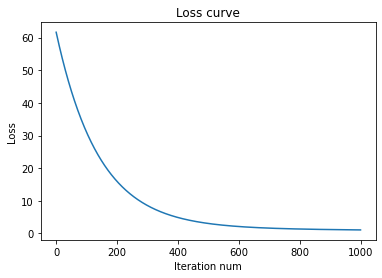

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [15]:
test_pred = predict(X_test, optimal_weights)

In [16]:
test_losses = [least_squared_error(y_test[i], test_pred[i]) for i in range(len(test_pred))]

In [17]:
avr_test_losses = np.mean(np.array(test_losses))
print(avr_test_losses)

0.05855124685981096


# """"""""""""""""""""""""""""""""""""""""""""""""

In [18]:
data_exp = data.copy()

In [19]:
del data_exp['# Fire places']

In [20]:
data_exp.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,29.9


In [21]:
X_train, X_test, y_train, y_test = split(data_exp)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21, 10) (7, 10)
(21, 1) (7, 1)


In [22]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 1000)

Loss:  34.81219500317623
Loss:  34.5926697719555
Loss:  34.374595326306945
Loss:  34.1579620388818
Loss:  33.94276034624607
Loss:  33.72898074845624
Loss:  33.516613808637686
Loss:  33.305650152566024
Loss:  33.09608046825108
Loss:  32.88789550552378
Loss:  32.68108607562563
Loss:  32.47564305080106
Loss:  32.27155736389237
Loss:  32.068820007937454
Loss:  31.86742203577008
Loss:  31.667354559622954
Loss:  31.468608750733328
Loss:  31.27117583895126
Loss:  31.07504711235049
Loss:  30.880213916841825
Loss:  30.68666765578921
Loss:  30.494399789628247
Loss:  30.303401835487314
Loss:  30.113665366811126
Loss:  29.925182012986863
Loss:  29.737943458972754
Loss:  29.551941444929163
Loss:  29.367167765851995
Loss:  29.183614271208747
Loss:  29.001272864576777
Loss:  28.82013550328408
Loss:  28.640194198052452
Loss:  28.461441012642954
Loss:  28.283868063503796
Loss:  28.107467519420556
Loss:  27.932231601168652
Loss:  27.758152581168208
Loss:  27.58522278314116
Loss:  27.413434581770638
Loss

Loss:  4.898789415013262
Loss:  4.875821901022361
Loss:  4.853001623230187
Loss:  4.8303276077689485
Loss:  4.807798887233771
Loss:  4.785414500639777
Loss:  4.763173493379484
Loss:  4.7410749171804385
Loss:  4.719117830063185
Loss:  4.6973012962994725
Loss:  4.675624386370755
Loss:  4.654086176926965
Loss:  4.63268575074557
Loss:  4.611422196690883
Loss:  4.590294609673658
Loss:  4.5693020906109485
Loss:  4.5484437463862255
Loss:  4.527718689809774
Loss:  4.5071260395793455
Loss:  4.486664920241068
Loss:  4.466334462150624
Loss:  4.446133801434677
Loss:  4.426062079952563
Loss:  4.406118445258226
Loss:  4.386302050562421
Loss:  4.366612054695151
Loss:  4.347047622068366
Loss:  4.327607922638903
Loss:  4.308292131871678
Loss:  4.289099430703115
Loss:  4.270029005504821
Loss:  4.251080048047509
Loss:  4.232251755465144
Loss:  4.213543330219346
Loss:  4.194953980064017
Loss:  4.176482918010206
Loss:  4.1581293622912066
Loss:  4.139892536327892
Loss:  4.121771668694274
Loss:  4.1037659930

Loss:  1.4910706292518183
Loss:  1.488884528463699
Loss:  1.4867089598390177
Loss:  1.4845438561455215
Loss:  1.4823891505952735
Loss:  1.4802447768417062
Loss:  1.4781106689766925
Loss:  1.4759867615276379
Loss:  1.4738729894545877
Loss:  1.4717692881473576
Loss:  1.4696755934226846
Loss:  1.4675918415213889
Loss:  1.465517969105565
Loss:  1.4634539132557827
Loss:  1.4613996114683143
Loss:  1.4593550016523724
Loss:  1.4573200221273714
Loss:  1.4552946116202063
Loss:  1.45327870926255
Loss:  1.4512722545881644
Loss:  1.4492751875302345
Loss:  1.4472874484187184
Loss:  1.4453089779777137
Loss:  1.4433397173228433
Loss:  1.4413796079586572
Loss:  1.4394285917760516
Loss:  1.4374866110497064
Loss:  1.435553608435537
Loss:  1.4336295269681665
Loss:  1.4317143100584142
Loss:  1.4298079014907958
Loss:  1.4279102454210473
Loss:  1.4260212863736597
Loss:  1.4241409692394353
Loss:  1.4222692392730543
Loss:  1.4204060420906612
Loss:  1.418551323667468
Loss:  1.4167050303353717
Loss:  1.414867108

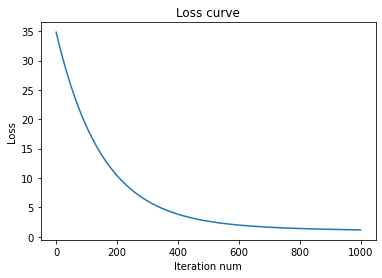

In [23]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [24]:
test_pred = predict(X_test, optimal_weights)
test_losses = [least_squared_error(y_test[i], test_pred[i]) for i in range(len(test_pred))]
avr_test_losses = np.mean(np.array(test_losses))
print(avr_test_losses)

0.059180088988798014


# """""""""""""""""""""""""""""""""""""""""""

In [25]:
data_exp = data.copy()
del data_exp['Living area']
data_exp.head()

,House ID,Local Price,Bathrooms,Land Area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.0,6,3,42,3,1,0,29.9


In [26]:
X_train, X_test, y_train, y_test = split(data_exp)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21, 10) (7, 10)
(21, 1) (7, 1)


In [27]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 1000)

Loss:  13.890360641960017
Loss:  13.801019048336212
Loss:  13.71228755021652
Loss:  13.624161959882233
Loss:  13.53663811837547
Loss:  13.449711895301625
Loss:  13.363379188633179
Loss:  13.277635924514888
Loss:  13.192478057070256
Loss:  13.107901568209387
Loss:  13.023902467438145
Loss:  12.940476791668583
Loss:  12.85762060503074
Loss:  12.775329998685688
Loss:  12.693601090639858
Loss:  12.612430025560684
Loss:  12.531812974593466
Loss:  12.451746135179516
Loss:  12.372225730875552
Loss:  12.293248011174317
Loss:  12.214809251326454
Loss:  12.13690575216359
Loss:  12.05953383992263
Loss:  11.982689866071256
Loss:  11.906370207134666
Loss:  11.83057126452344
Loss:  11.755289464362619
Loss:  11.680521257321978
Loss:  11.606263118447432
Loss:  11.532511546993602
Loss:  11.459263066257567
Loss:  11.386514223413705
Loss:  11.314261589349716
Loss:  11.24250175850373
Loss:  11.171231348702584
Loss:  11.100447001001154
Loss:  11.030145379522814
Loss:  10.96032317130102
Loss:  10.8909770861

Loss:  1.2027666700272412
Loss:  1.1991379441925385
Loss:  1.195531665284842
Loss:  1.1919476809342375
Loss:  1.1883858398158904
Loss:  1.1848459916428677
Loss:  1.1813279871590119
Loss:  1.1778316781318598
Loss:  1.1743569173456168
Loss:  1.1709035585941707
Loss:  1.1674714566741613
Loss:  1.1640604673780939
Loss:  1.1606704474874974
Loss:  1.157301254766137
Loss:  1.1539527479532663
Loss:  1.1506247867569288
Loss:  1.1473172318473048
Loss:  1.1440299448501068
Loss:  1.1407627883400135
Loss:  1.1375156258341566
Loss:  1.1342883217856483
Loss:  1.1310807415771509
Loss:  1.1278927515144979
Loss:  1.1247242188203512
Loss:  1.1215750116279068
Loss:  1.1184449989746417
Loss:  1.1153340507961034
Loss:  1.1122420379197449
Loss:  1.1091688320587958
Loss:  1.1061143058061857
Loss:  1.103078332628497
Loss:  1.1000607868599694
Loss:  1.0970615436965412
Loss:  1.0940804791899308
Loss:  1.091117470241761
Loss:  1.0881723945977224
Loss:  1.0852451308417772
Loss:  1.082335558390403
Loss:  1.07944355

Loss:  0.6280604500172016
Loss:  0.6275368262119488
Loss:  0.6270149265200242
Loss:  0.6264947404191072
Loss:  0.6259762574580982
Loss:  0.6254594672566317
Loss:  0.624944359504591
Loss:  0.6244309239616262
Loss:  0.6239191504566768
Loss:  0.6234090288874953
Loss:  0.6229005492201769
Loss:  0.6223937014886899
Loss:  0.6218884757944111
Loss:  0.6213848623056635
Loss:  0.6208828512572565
Loss:  0.620382432950032
Loss:  0.6198835977504099
Loss:  0.6193863360899394
Loss:  0.6188906384648527
Loss:  0.6183964954356211
Loss:  0.6179038976265149
Loss:  0.6174128357251664
Loss:  0.6169233004821346
Loss:  0.6164352827104751
Loss:  0.6159487732853112
Loss:  0.6154637631434076
Loss:  0.6149802432827497
Loss:  0.6144982047621222
Loss:  0.6140176387006937
Loss:  0.613538536277602
Loss:  0.6130608887315429
Loss:  0.6125846873603635
Loss:  0.6121099235206547
Loss:  0.6116365886273505
Loss:  0.6111646741533264
Loss:  0.6106941716290042
Loss:  0.6102250726419552
Loss:  0.6097573688365112
Loss:  0.609291

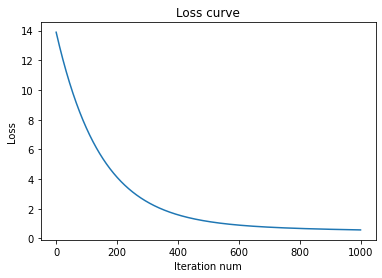

In [28]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [29]:
test_pred = predict(X_test, optimal_weights)
test_losses = [least_squared_error(y_test[i], test_pred[i]) for i in range(len(test_pred))]
avr_test_losses = np.mean(np.array(test_losses))
print(avr_test_losses)

0.06534933537995462


# """"""""""""""""""""""""""""""""""""""""""""

In [46]:
data_exp = data.copy()
data_exp = data_exp[['House ID','Living area','Price (1000$)']]
data_exp.head()

,House ID,Living area,Price (1000$)
0,1,0.998,25.9
1,2,1.500,29.5
2,3,1.175,27.9
3,4,1.232,25.9
4,5,1.121,29.9


In [47]:
X_train, X_test, y_train, y_test = split(data_exp)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21, 1) (7, 1)
(21, 1) (7, 1)


In [51]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 10000)

Loss:  1.5173399370755707
Loss:  1.5167972848642972
Loss:  1.5162548535663585
Loss:  1.515712643091822
Loss:  1.5151706533507887
Loss:  1.5146288842533997
Loss:  1.5140873357098312
Loss:  1.5135460076302945
Loss:  1.5130048999250405
Loss:  1.5124640125043536
Loss:  1.5119233452785568
Loss:  1.5113828981580086
Loss:  1.5108426710531049
Loss:  1.5103026638742771
Loss:  1.5097628765319935
Loss:  1.5092233089367584
Loss:  1.5086839609991134
Loss:  1.5081448326296358
Loss:  1.50760592373894
Loss:  1.507067234237676
Loss:  1.5065287640365308
Loss:  1.5059905130462268
Loss:  1.5054524811775238
Loss:  1.5049146683412176
Loss:  1.5043770744481406
Loss:  1.5038396994091607
Loss:  1.5033025431351823
Loss:  1.502765605537147
Loss:  1.5022288865260314
Loss:  1.5016923860128493
Loss:  1.5011561039086505
Loss:  1.50062004012452
Loss:  1.5000841945715815
Loss:  1.499548567160991
Loss:  1.4990131578039445
Loss:  1.4984779664116723
Loss:  1.4979429928954413
Loss:  1.4974082371665531
Loss:  1.49687369913

Loss:  1.2914589507015395
Loss:  1.291008254481559
Loss:  1.2905577417396947
Loss:  1.290107412401251
Loss:  1.2896572663915662
Loss:  1.2892073036360059
Loss:  1.288757524059969
Loss:  1.2883079275888816
Loss:  1.2878585141482033
Loss:  1.2874092836634212
Loss:  1.2869602360600545
Loss:  1.2865113712636531
Loss:  1.286062689199796
Loss:  1.285614189794092
Loss:  1.2851658729721824
Loss:  1.2847177386597364
Loss:  1.2842697867824553
Loss:  1.2838220172660701
Loss:  1.2833744300363403
Loss:  1.2829270250190588
Loss:  1.282479802140046
Loss:  1.2820327613251543
Loss:  1.2815859025002647
Loss:  1.2811392255912901
Loss:  1.2806927305241722
Loss:  1.2802464172248826
Loss:  1.279800285619425
Loss:  1.2793543356338315
Loss:  1.2789085671941642
Loss:  1.2784629802265164
Loss:  1.2780175746570113
Loss:  1.2775723504118017
Loss:  1.2771273074170697
Loss:  1.2766824455990295
Loss:  1.2762377648839236
Loss:  1.2757932651980253
Loss:  1.2753489464676373
Loss:  1.274904808619094
Loss:  1.27446085157

Loss:  1.0875281224806748
Loss:  1.0871604463579825
Loss:  1.0867929199159827
Loss:  1.0864255430937393
Loss:  1.0860583158303434
Loss:  1.0856912380649084
Loss:  1.0853243097365752
Loss:  1.0849575307845072
Loss:  1.0845909011478936
Loss:  1.0842244207659482
Loss:  1.0838580895779093
Loss:  1.0834919075230405
Loss:  1.0831258745406298
Loss:  1.0827599905699898
Loss:  1.082394255550458
Loss:  1.082028669421396
Loss:  1.0816632321221913
Loss:  1.081297943592255
Loss:  1.080932803771023
Loss:  1.0805678125979572
Loss:  1.0802029700125415
Loss:  1.079838275954287
Loss:  1.0794737303627278
Loss:  1.0791093331774237
Loss:  1.0787450843379587
Loss:  1.0783809837839404
Loss:  1.078017031455003
Loss:  1.0776532272908037
Loss:  1.0772895712310246
Loss:  1.076926063215373
Loss:  1.0765627031835794
Loss:  1.0761994910754005
Loss:  1.0758364268306166
Loss:  1.0754735103890316
Loss:  1.0751107416904764
Loss:  1.0747481206748035
Loss:  1.0743856472818927
Loss:  1.074023321451646
Loss:  1.07366114312

Loss:  0.9662917681984202
Loss:  0.9659734473106142
Loss:  0.9656552560110189
Loss:  0.9653371942468785
Loss:  0.9650192619654593
Loss:  0.964701459114049
Loss:  0.9643837856399573
Loss:  0.9640662414905139
Loss:  0.9637488266130714
Loss:  0.9634315409550032
Loss:  0.9631143844637041
Loss:  0.9627973570865905
Loss:  0.9624804587710999
Loss:  0.962163689464691
Loss:  0.9618470491148456
Loss:  0.9615305376690644
Loss:  0.9612141550748708
Loss:  0.96089790127981
Loss:  0.9605817762314477
Loss:  0.9602657798773708
Loss:  0.9599499121651884
Loss:  0.9596341730425302
Loss:  0.9593185624570476
Loss:  0.9590030803564132
Loss:  0.958687726688321
Loss:  0.9583725014004865
Loss:  0.9580574044406451
Loss:  0.9577424357565557
Loss:  0.9574275952959969
Loss:  0.957112883006769
Loss:  0.9567982988366935
Loss:  0.956483842733613
Loss:  0.956169514645392
Loss:  0.9558553145199156
Loss:  0.9555412423050902
Loss:  0.9552272979488433
Loss:  0.9549134813991238
Loss:  0.9545997926039014
Loss:  0.95428623151

Loss:  0.7869118248007785
Loss:  0.7866665293622505
Loss:  0.786421333783323
Loss:  0.7861762380233444
Loss:  0.7859312420416779
Loss:  0.7856863457977039
Loss:  0.7854415492508191
Loss:  0.7851968523604373
Loss:  0.7849522550859876
Loss:  0.7847077573869174
Loss:  0.7844633592226892
Loss:  0.7842190605527822
Loss:  0.7839748613366926
Loss:  0.7837307615339328
Loss:  0.7834867611040318
Loss:  0.7832428600065346
Loss:  0.7829990582010037
Loss:  0.7827553556470168
Loss:  0.7825117523041686
Loss:  0.7822682481320712
Loss:  0.7820248430903509
Loss:  0.7817815371386532
Loss:  0.7815383302366377
Loss:  0.7812952223439816
Loss:  0.7810522134203783
Loss:  0.7808093034255377
Loss:  0.7805664923191855
Loss:  0.7803237800610647
Loss:  0.7800811666109342
Loss:  0.7798386519285692
Loss:  0.7795962359737616
Loss:  0.7793539187063192
Loss:  0.7791117000860667
Loss:  0.7788695800728447
Loss:  0.7786275586265105
Loss:  0.7783856357069375
Loss:  0.7781438112740157
Loss:  0.7779020852876509
Loss:  0.7776

Loss:  0.6749209114792112
Loss:  0.6747212074630314
Loss:  0.6745215847462168
Loss:  0.6743220432956706
Loss:  0.674122583078309
Loss:  0.673923204061062
Loss:  0.6737239062108732
Loss:  0.6735246894946998
Loss:  0.6733255538795119
Loss:  0.6731264993322935
Loss:  0.672927525820042
Loss:  0.6727286333097675
Loss:  0.6725298217684947
Loss:  0.6723310911632611
Loss:  0.6721324414611177
Loss:  0.6719338726291288
Loss:  0.6717353846343723
Loss:  0.6715369774439395
Loss:  0.6713386510249344
Loss:  0.6711404053444762
Loss:  0.6709422403696953
Loss:  0.6707441560677369
Loss:  0.6705461524057589
Loss:  0.670348229350933
Loss:  0.6701503868704441
Loss:  0.6699526249314901
Loss:  0.6697549435012833
Loss:  0.6695573425470479
Loss:  0.669359822036023
Loss:  0.6691623819354593
Loss:  0.6689650222126227
Loss:  0.6687677428347906
Loss:  0.668570543769255
Loss:  0.6683734249833211
Loss:  0.6681763864443062
Loss:  0.6679794281195431
Loss:  0.6677825499763759
Loss:  0.6675857519821625
Loss:  0.667389034

Loss:  0.5991586097899564
Loss:  0.598989748553713
Loss:  0.5988209560607606
Loss:  0.5986522322831136
Loss:  0.5984835771927985
Loss:  0.5983149907618526
Loss:  0.5981464729623243
Loss:  0.5979780237662743
Loss:  0.5978096431457741
Loss:  0.5976413310729061
Loss:  0.5974730875197655
Loss:  0.5973049124584573
Loss:  0.5971368058610989
Loss:  0.5969687676998184
Loss:  0.5968007979467553
Loss:  0.5966328965740616
Loss:  0.5964650635538986
Loss:  0.5962972988584406
Loss:  0.5961296024598728
Loss:  0.5959619743303911
Loss:  0.5957944144422038
Loss:  0.5956269227675293
Loss:  0.5954594992785983
Loss:  0.5952921439476524
Loss:  0.5951248567469445
Loss:  0.5949576376487388
Loss:  0.5947904866253108
Loss:  0.594623403648947
Loss:  0.5944563886919462
Loss:  0.5942894417266171
Loss:  0.594122562725281
Loss:  0.5939557516602691
Loss:  0.593789008503925
Loss:  0.5936223332286028
Loss:  0.5934557258066688
Loss:  0.5932891862104994
Loss:  0.5931227144124828
Loss:  0.5929563103850185
Loss:  0.5927899

Loss:  0.545973271397882
Loss:  0.5458260618756345
Loss:  0.5456789122822806
Loss:  0.5455318225934229
Loss:  0.5453847927846747
Loss:  0.5452378228316583
Loss:  0.5450909127100072
Loss:  0.5449440623953633
Loss:  0.5447972718633798
Loss:  0.5446505410897191
Loss:  0.5445038700500534
Loss:  0.5443572587200652
Loss:  0.5442107070754468
Loss:  0.5440642150919002
Loss:  0.5439177827451374
Loss:  0.5437714100108803
Loss:  0.5436250968648607
Loss:  0.5434788432828207
Loss:  0.5433326492405112
Loss:  0.543186514713694
Loss:  0.5430404396781401
Loss:  0.5428944241096312
Loss:  0.5427484679839575
Loss:  0.5426025712769206
Loss:  0.5424567339643308
Loss:  0.5423109560220088
Loss:  0.5421652374257853
Loss:  0.5420195781514998
Loss:  0.5418739781750027
Loss:  0.5417284374721543
Loss:  0.541582956018824
Loss:  0.5414375337908915
Loss:  0.5412921707642459
Loss:  0.5411468669147866
Loss:  0.5410016222184226
Loss:  0.5408564366510729
Loss:  0.5407113101886658
Loss:  0.54056624280714
Loss:  0.54042123

Loss:  0.48032647705059345
Loss:  0.4802059922923307
Loss:  0.4800855565833283
Loss:  0.4799651699036188
Loss:  0.4798448322332424
Loss:  0.4797245435522472
Loss:  0.4796043038406897
Loss:  0.4794841130786345
Loss:  0.4793639712461543
Loss:  0.4792438783233301
Loss:  0.47912383429025035
Loss:  0.47900383912701266
Loss:  0.4788838928137217
Loss:  0.47876399533049085
Loss:  0.4786441466574415
Loss:  0.4785243467747029
Loss:  0.4784045956624128
Loss:  0.47828489330071655
Loss:  0.4781652396697677
Loss:  0.47804563474972833
Loss:  0.477926078520768
Loss:  0.4778065709630649
Loss:  0.47768711205680464
Loss:  0.47756770178218144
Loss:  0.4774483401193974
Loss:  0.47732902704866265
Loss:  0.4772097625501953
Loss:  0.4770905466042219
Loss:  0.47697137919097654
Loss:  0.47685226029070155
Loss:  0.4767331898836474
Loss:  0.4766141679500725
Loss:  0.47649519447024336
Loss:  0.4763762694244346
Loss:  0.4762573927929286
Loss:  0.47613856455601594
Loss:  0.47601978469399536
Loss:  0.4759010531871734

Loss:  0.4274866708836296
Loss:  0.427387697173436
Loss:  0.42728876375537045
Loss:  0.42718987061303015
Loss:  0.42709101773001873
Loss:  0.42699220508994656
Loss:  0.4268934326764311
Loss:  0.4267947004730958
Loss:  0.42669600846357164
Loss:  0.42659735663149523
Loss:  0.42649874496051055
Loss:  0.42640017343426806
Loss:  0.4263016420364248
Loss:  0.4262031507506447
Loss:  0.4261046995605978
Loss:  0.4260062884499616
Loss:  0.42590791740241946
Loss:  0.42580958640166183
Loss:  0.42571129543138564
Loss:  0.4256130444752948
Loss:  0.4255148335170993
Loss:  0.4254166625405159
Loss:  0.42531853152926835
Loss:  0.4252204404670868
Loss:  0.42512238933770785
Loss:  0.4250243781248752
Loss:  0.42492640681233834
Loss:  0.42482847538385426
Loss:  0.4247305838231862
Loss:  0.42463273211410374
Loss:  0.42453492024038364
Loss:  0.42443714818580885
Loss:  0.4243394159341688
Loss:  0.42424172346926003
Loss:  0.42414407077488525
Loss:  0.42404645783485395
Loss:  0.4239488846329821
Loss:  0.423851351

Loss:  0.3870298244269797
Loss:  0.38694732067063325
Loss:  0.38686485050150804
Loss:  0.386782413905931
Loss:  0.3867000108702343
Loss:  0.3866176413807556
Loss:  0.38653530542383835
Loss:  0.3864530029858314
Loss:  0.3863707340530895
Loss:  0.38628849861197234
Loss:  0.38620629664884576
Loss:  0.3861241281500807
Loss:  0.38604199310205395
Loss:  0.3859598914911477
Loss:  0.3858778233037497
Loss:  0.3857957885262532
Loss:  0.38571378714505716
Loss:  0.38563181914656613
Loss:  0.3855498845171898
Loss:  0.3854679832433437
Loss:  0.3853861153114487
Loss:  0.3853042807079314
Loss:  0.38522247941922383
Loss:  0.3851407114317637
Loss:  0.3850589767319939
Loss:  0.3849772753063631
Loss:  0.3848956071413256
Loss:  0.38481397222334074
Loss:  0.3847323705388739
Loss:  0.3846508020743956
Loss:  0.3845692668163818
Loss:  0.3844877647513146
Loss:  0.38440629586568104
Loss:  0.38432486014597367
Loss:  0.3842434575786908
Loss:  0.3841620881503359
Loss:  0.38408075184741824
Loss:  0.3839994486564527


Loss:  0.35663962243143366
Loss:  0.3565694905050271
Loss:  0.35649938712927864
Loss:  0.35642931229256536
Loss:  0.3563592659832691
Loss:  0.3562892481897761
Loss:  0.3562192589004778
Loss:  0.3561492981037703
Loss:  0.35607936578805394
Loss:  0.3560094619417345
Loss:  0.35593958655322183
Loss:  0.3558697396109308
Loss:  0.35579992110328124
Loss:  0.355730131018697
Loss:  0.35566036934560746
Loss:  0.35559063607244606
Loss:  0.3555209311876513
Loss:  0.3554512546796664
Loss:  0.3553816065369389
Loss:  0.35531198674792164
Loss:  0.35524239530107166
Loss:  0.35517283218485096
Loss:  0.35510329738772617
Loss:  0.35503379089816856
Loss:  0.3549643127046541
Loss:  0.35489486279566357
Loss:  0.3548254411596824
Loss:  0.35475604778520053
Loss:  0.3546866826607127
Loss:  0.3546173457747186
Loss:  0.35454803711572214
Loss:  0.3544787566722323
Loss:  0.35440950443276237
Loss:  0.35434028038583065
Loss:  0.35427108451995976
Loss:  0.3542019168236775
Loss:  0.3541327772855159
Loss:  0.35406366589

Loss:  0.32433527269694085
Loss:  0.3242782918486778
Loss:  0.324221334197278
Loss:  0.3241643997332982
Loss:  0.324107488447299
Loss:  0.32405060032984423
Loss:  0.3239937353715022
Loss:  0.3239368935628451
Loss:  0.3238800748944484
Loss:  0.32382327935689176
Loss:  0.3237665069407586
Loss:  0.32370975763663634
Loss:  0.32365303143511603
Loss:  0.3235963283267926
Loss:  0.3235396483022648
Loss:  0.3234829913521354
Loss:  0.32342635746701054
Loss:  0.32336974663750095
Loss:  0.3233131588542201
Loss:  0.3232565941077862
Loss:  0.3232000523888209
Loss:  0.32314353368794985
Loss:  0.3230870379958023
Loss:  0.3230305653030115
Loss:  0.32297411560021433
Loss:  0.32291768887805156
Loss:  0.32286128512716794
Loss:  0.32280490433821174
Loss:  0.3227485465018353
Loss:  0.3226922116086945
Loss:  0.3226358996494492
Loss:  0.3225796106147632
Loss:  0.32252334449530373
Loss:  0.32246710128174205
Loss:  0.32241088096475307
Loss:  0.3223546835350159
Loss:  0.322298508983213
Loss:  0.32224235730003065

Loss:  0.3015673435702428
Loss:  0.30151963152997513
Loss:  0.3014719389132458
Loss:  0.30142426571214725
Loss:  0.30137661191877557
Loss:  0.30132897752522964
Loss:  0.30128136252361193
Loss:  0.301233766906028
Loss:  0.30118619066458674
Loss:  0.30113863379140005
Loss:  0.30109109627858305
Loss:  0.3010435781182542
Loss:  0.30099607930253525
Loss:  0.3009485998235509
Loss:  0.30090113967342896
Loss:  0.300853698844301
Loss:  0.30080627732830134
Loss:  0.30075887511756766
Loss:  0.30071149220424065
Loss:  0.30066412858046454
Loss:  0.3006167842383865
Loss:  0.30056945917015687
Loss:  0.3005221533679294
Loss:  0.300474866823861
Loss:  0.3004275995301114
Loss:  0.300380351478844
Loss:  0.3003331226622253
Loss:  0.30028591307242447
Loss:  0.3002387227016149
Loss:  0.30019155154197197
Loss:  0.30014439958567507
Loss:  0.30009726682490667
Loss:  0.3000501532518522
Loss:  0.30000305885870027
Loss:  0.29995598363764264
Loss:  0.2999089275808748
Loss:  0.2998618906805945
Loss:  0.299814872929

Loss:  0.2778992789678856
Loss:  0.277861202180135
Loss:  0.2778231408934181
Loss:  0.27778509510142424
Loss:  0.2777470647978458
Loss:  0.2777090499763772
Loss:  0.2776710506307158
Loss:  0.2776330667545613
Loss:  0.2775950983416162
Loss:  0.2775571453855855
Loss:  0.27751920788017653
Loss:  0.2774812858190994
Loss:  0.2774433791960668
Loss:  0.277405488004794
Loss:  0.2773676122389985
Loss:  0.2773297518924008
Loss:  0.2772919069587236
Loss:  0.27725407743169245
Loss:  0.2772162633050352
Loss:  0.27717846457248235
Loss:  0.27714068122776714
Loss:  0.2771029132646251
Loss:  0.27706516067679426
Loss:  0.2770274234580157
Loss:  0.2769897016020323
Loss:  0.27695199510259005
Loss:  0.27691430395343736
Loss:  0.2768766281483251
Loss:  0.27683896768100663
Loss:  0.2768013225452381
Loss:  0.2767636927347778
Loss:  0.27672607824338713
Loss:  0.2766884790648294
Loss:  0.27665089519287117
Loss:  0.2766133266212807
Loss:  0.2765757733438295
Loss:  0.2765382353542912
Loss:  0.2765007126464421
Los

Loss:  0.2604841229845275
Loss:  0.2604531358945761
Loss:  0.2604221614194473
Loss:  0.2603911995540057
Loss:  0.26036025029311777
Loss:  0.26032931363165224
Loss:  0.26029838956448
Loss:  0.26026747808647377
Loss:  0.2602365791925086
Loss:  0.2602056928774615
Loss:  0.2601748191362116
Loss:  0.2601439579636402
Loss:  0.26011310935463045
Loss:  0.26008227330406786
Loss:  0.2600514498068398
Loss:  0.26002063885783594
Loss:  0.2599898404519478
Loss:  0.2599590545840691
Loss:  0.25992828124909567
Loss:  0.2598975204419253
Loss:  0.25986677215745807
Loss:  0.2598360363905958
Loss:  0.25980531313624267
Loss:  0.25977460238930494
Loss:  0.25974390414469084
Loss:  0.2597132183973105
Loss:  0.2596825451420764
Loss:  0.259651884373903
Loss:  0.25962123608770693
Loss:  0.2595906002784067
Loss:  0.259559976940923
Loss:  0.2595293660701784
Loss:  0.2594987676610979
Loss:  0.25946818170860836
Loss:  0.2594376082076386
Loss:  0.25940704715311963
Loss:  0.25937649853998457
Loss:  0.25934596236316854


Loss:  0.2478952846450825
Loss:  0.24786942246239893
Loss:  0.24784357080819175
Loss:  0.247817729678175
Loss:  0.2477918990680641
Loss:  0.2477660789735765
Loss:  0.24774026939043128
Loss:  0.24771447031434934
Loss:  0.24768868174105313
Loss:  0.247662903666267
Loss:  0.24763713608571716
Loss:  0.24761137899513114
Loss:  0.24758563239023879
Loss:  0.24755989626677125
Loss:  0.24753417062046149
Loss:  0.24750845544704436
Loss:  0.2474827507422563
Loss:  0.24745705650183564
Loss:  0.2474313727215221
Loss:  0.24740569939705764
Loss:  0.24738003652418555
Loss:  0.247354384098651
Loss:  0.2473287421162009
Loss:  0.24730311057258392
Loss:  0.24727748946355038
Loss:  0.24725187878485239
Loss:  0.2472262785322437
Loss:  0.24720068870148001
Loss:  0.24717510928831835
Loss:  0.24714954028851793
Loss:  0.24712398169783956
Loss:  0.24709843351204544
Loss:  0.24707289572689986
Loss:  0.24704736833816873
Loss:  0.24702185134161958
Loss:  0.24699634473302196
Loss:  0.24697084850814674
Loss:  0.24694

Loss:  0.23610883402299812
Loss:  0.23608777009610485
Loss:  0.23606671474432145
Loss:  0.23604566796415702
Loss:  0.23602462975212204
Loss:  0.2360036001047284
Loss:  0.23598257901848957
Loss:  0.2359615664899202
Loss:  0.23594056251553644
Loss:  0.235919567091856
Loss:  0.23589858021539772
Loss:  0.23587760188268225
Loss:  0.2358566320902313
Loss:  0.23583567083456813
Loss:  0.2358147181122175
Loss:  0.23579377391970543
Loss:  0.23577283825355944
Loss:  0.23575191111030858
Loss:  0.235730992486483
Loss:  0.23571008237861443
Loss:  0.23568918078323622
Loss:  0.23566828769688283
Loss:  0.23564740311609028
Loss:  0.23562652703739595
Loss:  0.23560565945733852
Loss:  0.23558480037245838
Loss:  0.2355639497792971
Loss:  0.23554310767439768
Loss:  0.2355222740543046
Loss:  0.23550144891556357
Loss:  0.235480632254722
Loss:  0.2354598240683285
Loss:  0.23543902435293299
Loss:  0.23541823310508714
Loss:  0.23539745032134374
Loss:  0.235376675998257
Loss:  0.23535591013238263
Loss:  0.2353351

Loss:  0.22704445671290813
Loss:  0.2270270828876671
Loss:  0.227009716135298
Loss:  0.22699235645292168
Loss:  0.22697500383765984
Loss:  0.22695765828663556
Loss:  0.22694031979697293
Loss:  0.22692298836579738
Loss:  0.22690566399023518
Loss:  0.22688834666741425
Loss:  0.2268710363944633
Loss:  0.2268537331685122
Loss:  0.22683643698669242
Loss:  0.226819147846136
Loss:  0.22680186574397668
Loss:  0.226784590677349
Loss:  0.22676732264338892
Loss:  0.22675006163923336
Loss:  0.2267328076620204
Loss:  0.22671556070888954
Loss:  0.2266983207769812
Loss:  0.2266810878634371
Loss:  0.22666386196539995
Loss:  0.22664664308001387
Loss:  0.22662943120442394
Loss:  0.22661222633577663
Loss:  0.22659502847121912
Loss:  0.22657783760790032
Loss:  0.22656065374296988
Loss:  0.22654347687357884
Loss:  0.22652630699687928
Loss:  0.22650914411002449
Loss:  0.2264919882101689
Loss:  0.22647483929446813
Loss:  0.226457697360079
Loss:  0.22644056240415922
Loss:  0.22642343442386817
Loss:  0.2264063

Loss:  0.21919733514472883
Loss:  0.21918315587718012
Loss:  0.21916898238200128
Loss:  0.21915481465684244
Loss:  0.2191406526993546
Loss:  0.21912649650718968
Loss:  0.2191123460780007
Loss:  0.2190982014094416
Loss:  0.21908406249916704
Loss:  0.21906992934483296
Loss:  0.21905580194409616
Loss:  0.21904168029461435
Loss:  0.21902756439404605
Loss:  0.21901345424005103
Loss:  0.21899934983028985
Loss:  0.21898525116242393
Loss:  0.21897115823411586
Loss:  0.218957071043029
Loss:  0.21894298958682784
Loss:  0.2189289138631775
Loss:  0.21891484386974452
Loss:  0.218900779604196
Loss:  0.21888672106420007
Loss:  0.21887266824742593
Loss:  0.2188586211515437
Loss:  0.21884457977422428
Loss:  0.21883054411313976
Loss:  0.21881651416596312
Loss:  0.2188024899303681
Loss:  0.2187884714040295
Loss:  0.2187744585846232
Loss:  0.21876045146982587
Loss:  0.21874645005731513
Loss:  0.2187324543447696
Loss:  0.21871846432986883
Loss:  0.21870448001029344
Loss:  0.2186905013837246
Loss:  0.218676

Loss:  0.21278150637453194
Loss:  0.21276993898638039
Loss:  0.21275837630730457
Loss:  0.21274681833538728
Loss:  0.21273526506871218
Loss:  0.21272371650536392
Loss:  0.2127121726434277
Loss:  0.2127006334809896
Loss:  0.21268909901613645
Loss:  0.21267756924695583
Loss:  0.21266604417153617
Loss:  0.2126545237879666
Loss:  0.21264300809433714
Loss:  0.2126314970887385
Loss:  0.21261999076926213
Loss:  0.21260848913400046
Loss:  0.21259699218104633
Loss:  0.21258549990849374
Loss:  0.2125740123144373
Loss:  0.21256252939697232
Loss:  0.21255105115419498
Loss:  0.21253957758420225
Loss:  0.2125281086850918
Loss:  0.21251664445496218
Loss:  0.21250518489191259
Loss:  0.21249372999404306
Loss:  0.21248227975945447
Loss:  0.21247083418624835
Loss:  0.2124593932725271
Loss:  0.21244795701639377
Loss:  0.21243652541595234
Loss:  0.2124250984693074
Loss:  0.2124136761745644
Loss:  0.2124022585298296
Loss:  0.21239084553321
Loss:  0.2123794371828133
Loss:  0.2123680334767481
Loss:  0.2123566

Loss:  0.20763260243152948
Loss:  0.20762313115856568
Loss:  0.2076136637413505
Loss:  0.20760420017831419
Loss:  0.20759474046788778
Loss:  0.2075852846085028
Loss:  0.2075758325985917
Loss:  0.20756638443658715
Loss:  0.20755694012092274
Loss:  0.20754749965003255
Loss:  0.20753806302235153
Loss:  0.20752863023631496
Loss:  0.20751920129035908
Loss:  0.20750977618292044
Loss:  0.20750035491243643
Loss:  0.20749093747734504
Loss:  0.20748152387608482
Loss:  0.20747211410709512
Loss:  0.2074627081688158
Loss:  0.20745330605968737
Loss:  0.20744390777815092
Loss:  0.20743451332264837
Loss:  0.207425122691622
Loss:  0.20741573588351492
Loss:  0.20740635289677092
Loss:  0.20739697372983426
Loss:  0.20738759838114987
Loss:  0.20737822684916332
Loss:  0.20736885913232098
Loss:  0.20735949522906952
Loss:  0.20735013513785652
Loss:  0.20734077885713006
Loss:  0.207331426385339
Loss:  0.20732207772093264
Loss:  0.20731273286236102
Loss:  0.20730339180807478
Loss:  0.2072940545565251
Loss:  0.2

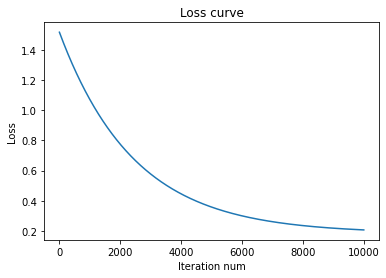

In [52]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [53]:
test_pred = predict(X_test, optimal_weights)
test_losses = [least_squared_error(y_test[i], test_pred[i]) for i in range(len(test_pred))]
avr_test_losses = np.mean(np.array(test_losses))
print(avr_test_losses)

0.005941241032823444
